## Tutorials

1. Get used to DL frameworks: https://pytorch.org/tutorials/beginner/basics/
2. Tutorial PyTorch: https://pytorch-geometric.readthedocs.io/en/latest/
    - focus on MessagePassing, DataSets and Deploy
3. Check Felix examples, including onnx

Notebook shortcuts: https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330

## High performance computation

Computations in PyTorch can be performend in 3 ways:
1. cpu: standard computation unit (no parallelization)
2. cuda: NVDIA's API to parallelize calculations in the NVDIA's GPU
3. mps (**M**edal **P**erformance **S**haders): framework to parallelize calculations on MacOS. This maps Machine Learning computational graphs and primitives on highly efficient Metal Performance Shaders Graph framework and tuned kernels provided by Metal Performance Shaders framework respectively.

### DeepLearning with PyTorch 

#### Tensors
Source: https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html
Tensor:
- data structure similar to arrays and matrices 
- in PyTorch, tensors are used to encode inputs, outputs and model parameters
- tensors are similar to numpy's arrays, except that tensors can run on GPUs (a tensor shares the underlying memory)
- tensors are created on the CPU by default, but can be moved to the gpu if available (CUDA: NVIDIA's SW layer that provides access to the GPU, MPS: framework to parallelize calculations on MacOS)
- tensors are optimized for automatic differentiation
- tensors feature the same built-in operations as the arrays


In [1]:
import torch
import numpy as np

# We move our tensor to the GPU if available
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# from python array
data = [[1,2], [3,4]]
data_tensor = torch.tensor(data)

# from numpy array
data_np = np.array(data)
data_tensor_from_np = torch.from_numpy(data_np)

# random tensors
shape = (2,3)
rand_tensor = torch.rand(shape) # same with .zeros and .ones
print(rand_tensor)

# attributes: shape, datatype, storage
print("\ntensor attributes")
print(f"Shape of tensor: {rand_tensor.shape}")
print(f"Datatype of tensor: {rand_tensor.dtype}")
print(f"Device tensor is stored on: {rand_tensor.device}")
    
# numpy-like operations
print("\nnumpy-like operations")
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

# join tensors
print("\njoin tensors")
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

# aritmetic operations
print("\nmatrix multiplication: tensor @ tensor OR tensor.matmul(tensor)")
print(f"original tensor: {data_tensor}")
print(data_tensor@data_tensor, data_tensor.matmul(data_tensor))
print("\nelement-wise product: tensor * tensor OR tensor.mul(tensor)")
print(data_tensor*data_tensor, data_tensor.mul(data_tensor))
print(f"\nsum tensor data with tensor.sum(): {data_tensor.sum()}")

# in-place operations: result is stored into the operand: memory saving, but no history saved -> no for derivatives
print("\nin-place oeprations have suffix _: add 5 with tensor.add_(5)")
print(f"{data_tensor}")
data_tensor.add_(5)
print(data_tensor)

# numpy array linked to tensor
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)
print("\nnumpy array linked to tensor")
print(f"t: {t}")
print(f"n: {n}")

Using mps device
tensor([[0.7452, 0.0525, 0.3887],
        [0.0733, 0.2884, 0.1254]])

tensor attributes
Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu

numpy-like operations
First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

join tensors
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

matrix multiplication: tensor @ tensor OR tensor.matmul(tensor)
original tensor: tensor([[1, 2],
        [3, 4]])
tensor([[ 7, 10],
        [15, 22]]) tensor([[ 7, 10],
        [15, 22]])

element-wise product: tensor * tensor OR tensor.mul(tensor)
tensor([[ 1,  4],
        [ 9, 16]]) tensor([[ 1,  4],


### Datasets and dataloaders
Source: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

Dataset code is decoupled from the model training code for better readability and modularity (maintainability).

PyTorch provides two data primitives: 
- torch.utils.data.Dataset: DataLoader wraps an iterable around the Dataset to enable easy access to the samples
- torch.utils.data.DataLoader: API to pass batches of data to train the model

A custom Dataset class must implement three functions: __init__, __len__, and __getitem__:
- __init__(): We initialize the directory containing the images, the annotations file, and both transforms 
- __len__(): returns the size of the dataset
- __getitem__(idx): returns the item (and its label) of the dataset located at the index idx

While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an **iterable** that abstracts this complexity for us in an easy API.


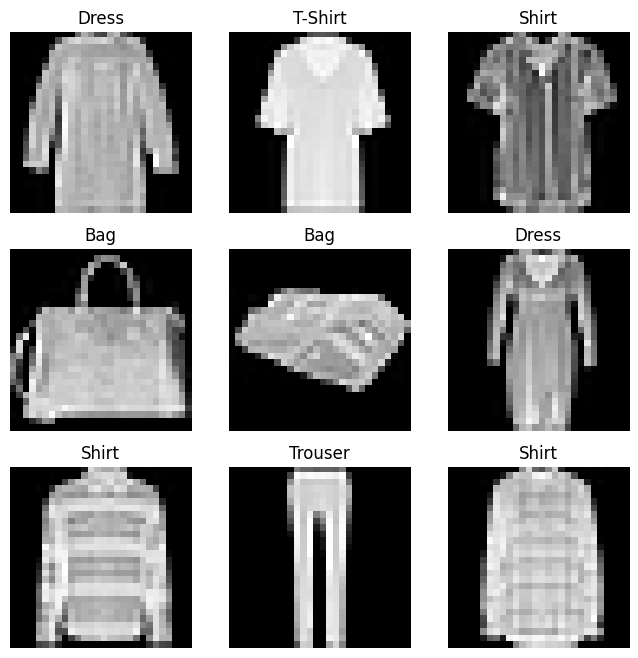

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


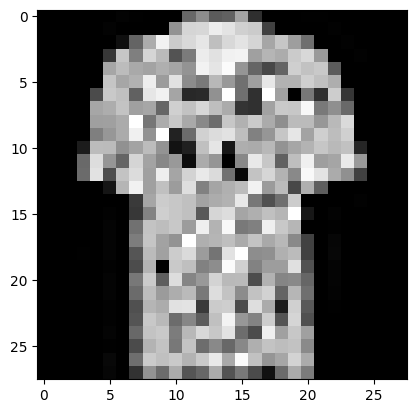

Label: 6


In [2]:
import torch, os
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd
from torchvision.io import read_image


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


## custom dataset
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file) # load labels of data from file
        self.img_dir = img_dir # path to data (folder of pictures)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    
    
# dataLoader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### Transforms
Source: https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html

PyTorch's **Transorms** are necessary to **prepare the data to train / use the Machine Learning model**.

TorchVision datasets have two parameters:
1. transform: function that modifies the features of the data. Many in-built functions can be directly used (see ToTensor())
2. target_transform: function that modifies the label of the data

In general, built-in functions, lambdas or user-defined functions can be passed to these parameters.

In [3]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

### Build the neural network
Source: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

Neural networks comprise of **layers/modules that perform operations on data**. A neural network is a **module itself that consists of other modules (layers)**. This nested structure allows for building and managing complex architectures easily. 

The **torch.nn** namespace **provides all the building blocks you need to build your own neural network**. This means that *the neural network is defined by using the subclasses of torch.nn only*.

The Neural Network is a **class()** that **inherits from nn.Module**. The class has the following methods:
- __init__(): initialization of all the layers of the neural network
- __forward__(): defines the operations on the input data

To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call model.forward() directly!

EXAMPLE TUTORIAL: Neural Network that classifies the images in the FashionMNIST dataset.

**TO DO: understand softmax**

In [4]:
import os
import torch

# import module for neural networks
from torch import nn

# import DataLoader for batching the data
from torch.utils.data import DataLoader

# import dataset library to store the dataset in pytorch
from torchvision import datasets, transforms

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
print("The device is used when we create the instance of the neural network")

Using mps device
The device is used when we create the instance of the neural network


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        """Initialize the layers of the Neural Network."""
        
        super().__init__() # needed to inherit functions
        self.flatten = nn.Flatten()
        
        # nn.Sequential is the container of all the NN layers to be executed
        # the sequence of layer is defined in nn.Sequential
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features = 28*28, out_features = 512), 
            nn.ReLU(),
            nn.Linear(in_features = 512, out_features = 512),
            nn.ReLU(),
            nn.Linear(in_features = 512, out_features = 10), # output vector of size 10 (or 1x10)
        )

    def forward(self, x):
        """Define the operations on the inut data."""
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
# create the NN object and move it to the defined device

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [7]:
# create a test input data: tensor of size 1x28x28, which means 1 image of size 28x28
X = torch.rand(1, 28, 28, device=device)

# use the non-trained model and get the output 1x10 vector (see layer definition)
logits = model(X)
print(logits)

# apply softmax to select the class of the output vector with highest probability
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

tensor([[ 0.1088, -0.0136, -0.0297,  0.0100,  0.0193, -0.0565,  0.0295, -0.0791,
          0.0037,  0.1063]], device='mps:0', grad_fn=<LinearBackward0>)
Predicted class: tensor([0], device='mps:0')


#### Understand the layers of the Neural Network

1. **nn.Flatten**: transforms the input image (2D array) into a 1D array (from 28x28 to 784)
2. **nn.Linear**: apply a linear transformation to the input data using its stored (default) weights and biases. Input data size and output size must be defined.
3. **nn.ReLU**: introduction of a non-linear transformation after the linear layer. Non-linear activations are what create the complex mappings between the model’s inputs and outputs. This nonlinearity helps neural networks learn a wide variety of phenomena. Often, ReLU is simply an if condition: {return x if x>=0, otherwise return 0}
4. **nn.Sequential**: ordered container of modules (here we define the ordered layers of the Neural Network to be executed) --> here we actually define our Neural Network
5. **nn.Softmax**: last linear layer of the neural network. Transforms the values of the input vector into a **vector of probabilities**. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.
![image](images/softmax.png)

In [8]:
# ======================== Test on nn.Flatten ==============================
# Let's consider now 3 images of size 28x28
input_image = torch.rand(3,28,28)
print(f"\nTest the nn.Flatten layer")
print(f"Original input image size: {input_image.size()}")

# flatten layer object
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(f"Size of data after the flatten layer: {flat_image.size()}")

# ======================== Test on nn.Linear ===============================
# Let's consider 3 images of size 28x28
print(f"\nTest the nn.Linear layer")
linear_layer = nn.Linear(in_features=28*28, out_features=20)
linear_layer_output = linear_layer(flat_image)
print(f"Size of the input data of the linear layer: {flat_image.size()}")
print(f"Size of the output data of the linear layer: {linear_layer_output.size()}")

# ========================= Test nn.ReLU ===================================
# Let's consider the output of the linear layer (ReLU is applied after the linear layer)
print(f"\nTest the nn.ReLU layer (nonlinearity: keep the positive values only)")
print(f"Before ReLU: {linear_layer_output[0]}\n")
linear_layer_output = nn.ReLU()(linear_layer_output)
print(f"After ReLU: {linear_layer_output[0]}")

# ========================= Test nn.Sequential ==============================
print(f"\nTest the nn.Sequential (the neural network) ")

seq_modules = nn.Sequential(
    flatten,
    linear_layer,
    nn.ReLU(),
    nn.Linear(20, 10) # in_features = 20, out_features = 10
)
input_image = torch.rand(1,28,28)
print(f"Input of the NN model: {input_image.size()}")
logits = seq_modules(input_image)
print(f"Output of the NN model (one 10x1 logit for each image): {logits}")

# ========================= Test nn.Softmax ==============================
# Let's consider the output of the previous Neural Network
print(f"\nTest the nn.Softmax layer ")
print(f"Input of the Softmax: {logits}")
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(f"Output of the Softmax: {pred_probab}")
print(sum(pred_probab[0].detach().numpy()))

# ======================= Get the model parameters ==========================

print(f"\nPrint the model layers and their parameters ")
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")


Test the nn.Flatten layer
Original input image size: torch.Size([3, 28, 28])
Size of data after the flatten layer: torch.Size([3, 784])

Test the nn.Linear layer
Size of the input data of the linear layer: torch.Size([3, 784])
Size of the output data of the linear layer: torch.Size([3, 20])

Test the nn.ReLU layer (nonlinearity: keep the positive values only)
Before ReLU: tensor([ 0.2340,  0.0459, -0.2722,  0.1563, -0.5777, -0.0818,  0.5153, -0.5477,
        -0.5571,  0.0058,  0.9944, -0.0574,  0.0659, -0.0499, -0.0214, -0.1936,
         0.0496, -0.7603,  0.2782, -0.3329], grad_fn=<SelectBackward0>)

After ReLU: tensor([0.2340, 0.0459, 0.0000, 0.1563, 0.0000, 0.0000, 0.5153, 0.0000, 0.0000,
        0.0058, 0.9944, 0.0000, 0.0659, 0.0000, 0.0000, 0.0000, 0.0496, 0.0000,
        0.2782, 0.0000], grad_fn=<SelectBackward0>)

Test the nn.Sequential (the neural network) 
Input of the NN model: torch.Size([1, 28, 28])
Output of the NN model (one 10x1 logit for each image): tensor([[-0.1641, 

### Gradient descent and backpropagation (autograd) 
Source: https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

Neural networks are mostly trained with the **gradient descent** algorithm. Here model parameters are calculated in order to **minimize the mean squared error (MSE)** of the loss function. The parameters (model weights) are adjusted according to the *gradient of the loss function* with respect to the given parameter.

The gradient descent method involves calculating the derivative of the loss function with respect to the weights of the network. This is normally done using **backpropagation**.

#### Gradient descent

Source: https://www.ibm.com/topics/gradient-descent

The **gradient descent** (also often called **steepest descent**) is a *first-order iterative optimization algorithm* for finding a *local minimum* of a *differentiable function*. 

The method was created by **Augustin-Louis Cauchy**.

To find a local minimum of a differentialble function *f*(**x**), the iterative formula is:

**x**_(*k*+1) = **x**_*k* - d * GRAD(*f*(**x**_*k*))

where *d* is the learning rate and *k* is the **learning epoch**. In the equation, we see that the best direction to move from **x** is the anti-gradient direction.

The gradient descent is an *optimization algorithm* which is commonly-used to train machine learning models and neural networks.  Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates

The most important paramenter is the **learning rate** (also referred to as step size or the alpha), which is the size of the steps that are taken to reach the minimum. Usually a small value.
![image](images/learning_rate.png)


There are 3 types of gradient descent:
1. **batch**: all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that’s just one step of gradient descent in one epoch. PRO: stability and convergence. CONS: heavy cpu / memory usage
2. **stochastic**: just one training data is used to perform a step. PRO: less cpu load & memory usage; noisy gradients, but this can also be helpful in escaping the local minimum and finding the global one. CONS: minimum will not be reached exactly, but the loss value will oscillate around it.
3. **mini-batch**: mix of stochastic and batch

The gradient descent method has the following limitations:

- For convex problems, gradient descent can find the global minimum with ease, but as **nonconvex problems** emerge, gradient descent can *struggle to find the global minimum, where the model achieves the best results*. Infact, when the slope of the cost function is at or close to zero, the model stops learning. 
- Vanishing gradients: This occurs when the gradient is too small. As we move backwards during backpropagation, the gradient continues to become smaller, causing the earlier layers in the network to learn more slowly than later layers. When this happens, the weight parameters update until they become insignificant—i.e. 0—resulting in an algorithm that is no longer learning.
- Exploding gradients: This happens when the gradient is too large, creating an unstable model. In this case, the model weights will grow too large, and they will eventually be represented as NaN. One solution to this issue is to leverage a dimensionality reduction technique, which can help to minimize complexity within the model.

#### Backpropagation vs. gradient descent

It's very important to clearly distinguish between the two algos:
- **gradient descent**: optimization algorithm for minimizing the loss of a predictive model with regard to a training dataset
- **back-propagation**: *automatic differentiation algorithm for calculating gradients* for the weights in a neural network graph structure. It uses the *chain rule* to compute the gradient. 

Source (backpropagation): https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd

**gradient**: measures the **sensitivity to change of the function value (output value) with respect to a change in its argument x** (input value)


#### Training with PyTorch

PyTorch has a built-in differentiation engine called torch.autograd to compute gradients. It supports automatic computation of gradient for any computational graph.

To enable autograd, we need to set **requires_grad=True** to all the parameter-tensors we need to optimize, which means for each parameter-tensor **w** for which we must calculate the gradient *d*loss/*d***w**:
1. argument **requires_grad=True** when declaring the *variables to be optimized*
2. after the variable declaration, we use **.requires_grad_(True)**

Then we define the function to be minimized according to the paramenters and we call **function.backward()** to numerically compute the gradient values.

We can only perform gradient calculations using backward once on a given graph, for performance reasons. If we need to do several backward calls on the same graph, we need to pass retain_graph=True to the backward call.

To optimize weights of parameters in the neural network, we need to **compute the derivatives of our loss function with respect to parameters**, namely *d*loss / *d*w and *d*loss / *d*b.

Conceptually, *autograd keeps a record of data (tensors) and all executed operations (along with the resulting new tensors) in a directed acyclic graph (DAG)* consisting of Function objects. In this DAG, leaves are the input tensors, roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

#### In summary

1. **gradient descent** is the classical algorithm used to calculate the model parameters **p** such that they minimize the loss function *f*_ loss(**x**) = **y** - model(**x**). Here, **x** are the training data (known) and **y** are their labels (known). The optimal parameters **p** are iteratively computed as: **p**_(*k*+1) = **p**_*k* - d * GRAD(*f*_ loss(**p**_*k*)), with d learning rate and k the learning epoch. This is a classical optmizazion algo from numerical calculus (L. Cauchy). Gradient descent can be used as:
    - *batch*: for each epoch, all the training data are used to compute the gradients. Then, an average gradient is used.
    - *stochastic*: one single training data is used to calculate the gradient in each epoch


2. the calculation is the gradients *df*_ loss / *d***p** is done via **backpropagation** (numerical algo to compute the value of the gradient, otherwise impossible using close solutions).

3. In PyTorch, there is an built-in engine to compute the gradient, called *torch.autograd*. The parameters of the model that must be optimized shall be defined as tensor with the argument **requires_grad=True**

4. We apply the backpropagation with *loss.backward()*, then we get the gradient values as **p**.grad

5. When requires_grad=True, PyTorch tracks a lot of gradient values to speed-up the gradient calculation. After the model is trained, we need to disable this tracking with *torch.no_grad()*


To compute those derivatives, we call loss.backward(), and then retrieve the values from w.grad and b.grad:

In [27]:
import torch

# Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. 
# The model is x*w+b=z, with x: 5x1, w:5x3, b:3x1, z:3x1
# Error to be minimized: z - y
# Parameters to be optimized: w,b

x = torch.ones(5)  # input tensor

# Machine learning model
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b

# Expected output
y = torch.zeros(3)

# Loss function to be minimized
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

# To optimize the loss function, we need to calculate the *gradient of the loss*
print("\nWe have now object functions to calculate the gradiens:")
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

# Use pytorch built-in backpropagation to compute the gradient of the loss function
loss.backward()
print(f"Gradient dloss/dw (loss: 3x1; w: 5x1)= {w.grad}")
print(f"Gradient dloss/db (loss: 3x1; b: 3x1)= {b.grad}")


We have now object functions to calculate the gradiens:
Gradient function for z = <AddBackward0 object at 0x15f878940>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x15f946e30>
Gradient dloss/dw (loss: 3x1; w: 5x1)= tensor([[0.2797, 0.2139, 0.2926],
        [0.2797, 0.2139, 0.2926],
        [0.2797, 0.2139, 0.2926],
        [0.2797, 0.2139, 0.2926],
        [0.2797, 0.2139, 0.2926]])
Gradient dloss/db (loss: 3x1; b: 3x1)= tensor([0.2797, 0.2139, 0.2926])


#### Disabling gradient tracking (often after the training)
By default, all tensors with requires_grad=True are tracking their computational history and support gradient computation. However, there are some cases when we do not need to do that, for example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do forward computations through the network. We can stop tracking computations by surrounding our computation code with torch.no_grad() block.
Alternatively, we use detach()

In [29]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

True
False
False


### Training the NN model: optimization loop
Source: https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

Training the Neural Network is an **interative process** that uses the gradient descent to compute the model parameters that minimize the loss function.

We need to set 3 *hyperparameters*:
1. **learning rate**: "scaling factor" of the gradient in the gradient descent formula
2. **batch size**: the number of data samples propagated through the network before the parameters are updated
3. **epoch**: number of iterations of the gradient descent. Each epoch consists of two main parts, **which must be manually implemented**:
    - **train loop**: interations over the training dataset to converge to optimal parameters
    - **validation loop**: iterations over the test dataset to check if model performance is improving

In pyTorch, the optimization is done by using built-in classes, thus via initializing objects. These classes are located in **torch.optim**.

In order to manually implement the epoch's training loop, we can follow the following steps:
1. **reset the gradients** at the beginning of an epoch via **optimizer.zero_grad()**
2. **calculate the gradients** with backpropagation via **loss.backpropagate()**
3. **do the iteration** with the gradient descent formula via **optimizer.step()**

The following code is taken from the previous sections of this tutorial:

In [9]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [10]:
# hyperparameters for the training 
learning_rate = 1e-3
batch_size = 64
epochs = 5 #iterations of the gradient descent

# Initialize the Stochastic Gradient Descent (SGD) object
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Save, load, use
Source: https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html



### Torch compile
Source: https://pytorch.org/tutorials/intermediate/torch_compile_tutorial.html?utm_source=whats_new_tutorials&utm_medium=torch_compile